In [293]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
train_data_path = '/Users/dimeji/Downloads/customer-churn-prediction-2020/train.csv'

In [6]:
train_data = pd.read_csv(train_data_path)
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


The columns meaning in the dataframe:

state, string. 2-letter code of the US state of customer residence

account_length, numerical. Number of months the customer has been with the current telco provider

area_code, string="area_code_AAA" where AAA = 3 digit area code.

international_plan, (yes/no). The customer has international plan.

voice_mail_plan, (yes/no). The customer has voice mail plan.

number_vmail_messages, numerical. Number of voice-mail messages.

total_day_minutes, numerical. Total minutes of day calls.

total_day_calls, numerical. Total number of day calls.

total_day_charge, numerical. Total charge of day calls.

total_eve_minutes, numerical. Total minutes of evening calls.

total_eve_calls, numerical. Total number of evening calls.

total_eve_charge, numerical. Total charge of evening calls.

total_night_minutes, numerical. Total minutes of night calls.

total_night_calls, numerical. Total number of night calls.

total_night_charge, numerical. Total charge of night calls.

total_intl_minutes, numerical. Total minutes of international calls.

total_intl_calls, numerical. Total number of international calls.

total_intl_charge, numerical. Total charge of international calls

number_customer_service_calls, numerical. Number of calls to customer service

churn, (yes/no). Customer churn - target variable.

Data Cleaning & Exploration

In [7]:
train_data.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
numeric_columns = ['int64', 'float64']
num_train_data = train_data.select_dtypes(include=numeric_columns)
num_train_data.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [9]:
y = train_data['churn']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

In [10]:
y.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [11]:
y.replace(['no', 'yes'], [0,1], inplace=True)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [12]:
y.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [14]:
num_train_data.dtypes

account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [49]:
num_train_data.astype('float')

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
1,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
2,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
3,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
4,121.0,24.0,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83.0,0.0,188.3,70.0,32.01,243.8,88.0,20.72,213.7,79.0,9.62,10.3,6.0,2.78,0.0
4246,73.0,0.0,177.9,89.0,30.24,131.2,82.0,11.15,186.2,89.0,8.38,11.5,6.0,3.11,3.0
4247,75.0,0.0,170.7,101.0,29.02,193.1,126.0,16.41,129.1,104.0,5.81,6.9,7.0,1.86,1.0
4248,50.0,40.0,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,9.9,5.0,2.67,2.0


Data Analysis

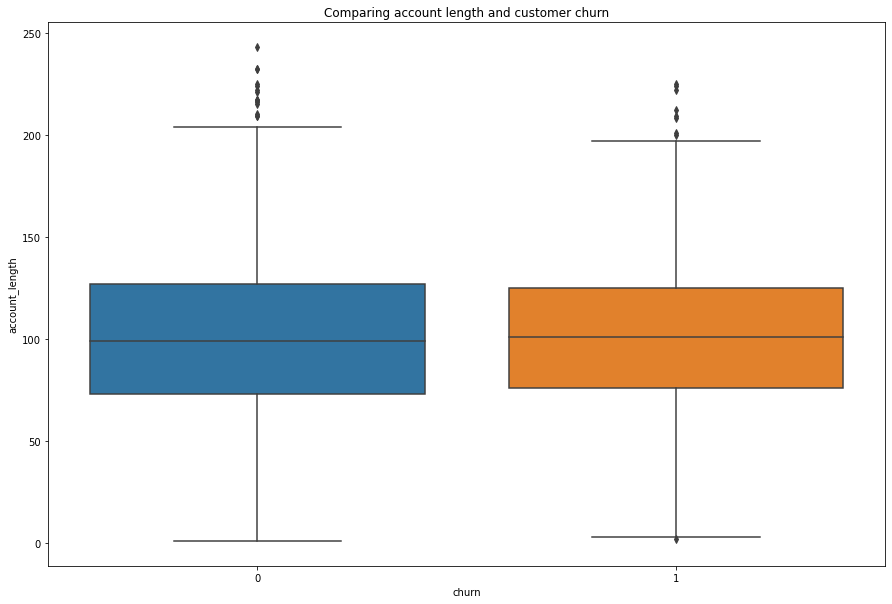

In [22]:
plt.figure(figsize=(15,10))
plt.title('Comparing account length and customer churn')
sns.boxplot(x='churn', y='account_length', data=train_data)
plt.show()

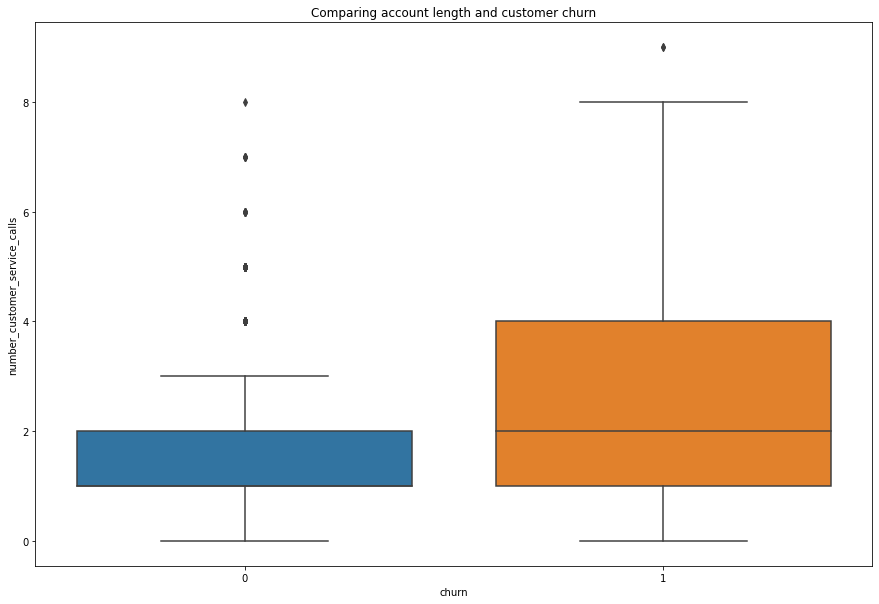

In [34]:
plt.figure(figsize=(15,10))
plt.title('Comparing numner of calls to customer services and customer churn')
sns.boxplot(x='churn', y='number_customer_service_calls', data=train_data)
plt.show()

Splitting Data into Training & Testing Data - Also scalling the data

In [50]:
x_train, x_test, y_train, y_test = train_test_split(num_train_data, y, random_state=10, test_size=0.2)

In [51]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3400, 15) (850, 15) (3400,) (850,)


In [54]:
x_train_scaled = preprocessing.StandardScaler().fit_transform(x_train)

In [55]:
x_test_scaled = preprocessing.StandardScaler().fit_transform(x_test)

Using Decision Tree Model to predict customer churning. Using GridSearch CV to find best parameters for Decision Tree. Comparing the accuracy score of the unscaled values and the scaled values and picking the best one.

In [59]:
tree = DecisionTreeClassifier()

In [60]:
tree_params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
               'max_features': ['auto', 'sqrt'],
              'max_depth': [5,6,7,8,9,10],
                'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10]
              }

In [87]:
tree_grid = GridSearchCV(tree, tree_params, cv=4)
tree_grid

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [88]:
tree_grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [89]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4)

In [90]:
tree_grid.best_score_

0.9108823529411765

In [96]:
tree_predictions = tree_grid.predict(x_test)
tree_predictions[0:5]

array([0, 0, 0, 0, 0])

In [164]:
tree_accuracy_score = accuracy_score(y_test, tree_predictions)
tree_accuracy_score

0.8976470588235295

In [93]:
tree_grid_scaled = GridSearchCV(tree, tree_params, cv=4)
tree_grid_scaled.fit(x_train_scaled, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [94]:
tree_grid_scaled.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='auto')

In [95]:
tree_grid_scaled.best_score_

0.908235294117647

In [102]:
tree_scaled_predictions = tree_grid_scaled.predict(x_test_scaled)
tree_scaled_predictions[0:5]

array([0, 0, 0, 0, 0])

In [165]:
tree_scaled_accuracy_score = accuracy_score(y_test, tree_scaled_predictions)
tree_scaled_accuracy_score

0.9047058823529411

In [106]:
print(classification_report(y_test, tree_scaled_predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       725
           1       0.73      0.55      0.63       125

    accuracy                           0.90       850
   macro avg       0.83      0.76      0.79       850
weighted avg       0.90      0.90      0.90       850



Using svm to predict customer churning. Using GridSearch CV to find best parameters for svm model. Comparing the accuracy score of the unscaled values and the scaled values and picking the best one.

In [70]:
SVM = svm.SVC()
SVM

SVC()

In [71]:
svm_params = {'kernel': ['linear','sigmoid'],
 'gamma': ['scale', 'auto']}

In [72]:
svm_grid = GridSearchCV(SVM, svm_params, cv=4)
svm_grid

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [73]:
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [74]:
svm_grid.best_estimator_

SVC(kernel='linear')

In [75]:
svm_grid.best_score_

0.8608823529411764

In [105]:
svm_predictions = svm_grid.predict(x_test)
svm_predictions[0:5]

array([0, 0, 0, 0, 0])

In [166]:
svm_accuracy_score = accuracy_score(y_test, svm_predictions)
svm_accuracy_score

0.8529411764705882

In [109]:
svm_grid_scaled = GridSearchCV(SVM, svm_params, cv=4)
svm_grid_scaled

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [110]:
svm_grid_scaled.fit(x_train_scaled, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [111]:
svm_grid_scaled.best_estimator_

SVC(kernel='linear')

In [113]:
svm_grid_scaled.best_score_

0.8608823529411764

In [114]:
svm_scaled_predictions = svm_grid_scaled.predict(x_test_scaled)
svm_scaled_predictions[0:5]

array([0, 0, 0, 0, 0])

In [167]:
svm_scaled_accuracy_score = accuracy_score(y_test, svm_scaled_predictions)
svm_scaled_accuracy_score

0.8529411764705882

In [117]:
print(classification_report(y_test, svm_scaled_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       125

    accuracy                           0.85       850
   macro avg       0.43      0.50      0.46       850
weighted avg       0.73      0.85      0.79       850



Using KNN to predict customer churning. Using GridSearch CV to find best parameters for KNN model. Comparing the accuracy score of the unscaled values and the scaled values and picking the best one.

In [118]:
knn = KNeighborsClassifier()

In [119]:
knn_params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p': [1,2]}

In [120]:
knn_grid = GridSearchCV(knn, knn_params, cv=4)
knn_grid

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [122]:
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [123]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

In [124]:
knn_grid.best_score_

0.8926470588235293

In [125]:
knn_predictions = knn_grid.predict(x_test)
knn_predictions[0:5]

array([0, 0, 0, 0, 0])

In [168]:
knn_accuracy_score = accuracy_score(y_test, knn_predictions)
knn_accuracy_score

0.8952941176470588

In [127]:
knn_grid_scaled = GridSearchCV(knn, knn_params, cv=4)
knn_grid_scaled

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [128]:
knn_grid_scaled.fit(x_train_scaled, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [129]:
knn_grid_scaled.best_estimator_

KNeighborsClassifier(p=1)

In [130]:
knn_grid_scaled.best_score_

0.895

In [132]:
knn_scaled_predictions = knn_grid_scaled.predict(x_test_scaled)
knn_scaled_predictions[0:5]

array([0, 0, 0, 0, 0])

In [169]:
knn_scaled_accuracy_score = accuracy_score(y_test, knn_scaled_predictions)
knn_scaled_accuracy_score

0.8870588235294118

In [134]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       725
           1       0.89      0.33      0.48       125

    accuracy                           0.90       850
   macro avg       0.89      0.66      0.71       850
weighted avg       0.89      0.90      0.87       850



Using logistic regression to predict customer churning. Using GridSearch CV to find best parameters for logistic regression model. Comparing the accuracy score of the unscaled values and the scaled values and picking the best one.

In [135]:
lr = LogisticRegression()

In [136]:
lr_params = {'C': [0.01, 0.1, 1],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg'],
            'max_iter': [100, 200]}

In [137]:
lr_grid = GridSearchCV(lr, lr_params, cv=4)
lr_grid

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 200],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [139]:
lr_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 200],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [140]:
lr_grid.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [141]:
lr_grid.best_score_

0.8694117647058823

In [142]:
lr_grid_predictions = lr_grid.predict(x_test_scaled)
lr_grid_predictions[0:5]

array([0, 0, 0, 0, 0])

In [269]:
lr_scaled_accuracy_score = accuracy_score(y_test, lr_grid_predictions)
lr_scaled_accuracy_score

0.8541176470588235

In [144]:
print(classification_report(y_test, lr_grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       725
           1       0.52      0.11      0.18       125

    accuracy                           0.85       850
   macro avg       0.69      0.55      0.55       850
weighted avg       0.81      0.85      0.81       850



Creating a table to compare the accuracy scores of the models

In [256]:
original_dataframe = pd.DataFrame(columns=['Accuracy Score', 'Scaled Accuracy Score'])
original_dataframe

,Accuracy Score,Scaled Accuracy Score


In [267]:
original_dataframe.loc['Decision Tree'] = [tree_accuracy_score, tree_scaled_accuracy_score]
original_dataframe.loc['SVM'] = [svm_accuracy_score, svm_scaled_accuracy_score]
original_dataframe.loc['KNN'] = [knn_accuracy_score, knn_scaled_accuracy_score]
original_dataframe.loc['Logistic Regression'] = [np.nan, lr_scaled_accuracy_score]

original_dataframe

,Accuracy Score,Scaled Accuracy Score
Decision Tree,0.897647,0.904706
SVM,0.852941,0.852941
KNN,0.895294,0.887059
Logistic Regression,NaN,0.858824


Doing the same models again but adding the object types columns ['area_code', 'international_plan', 'voice_mail_plan'] in the train data as one hot encoded, see how the accuracy score of the data is affected

In [179]:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [180]:
train_data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [181]:
train_data.shape

(4250, 20)

<AxesSubplot:xlabel='area_code'>

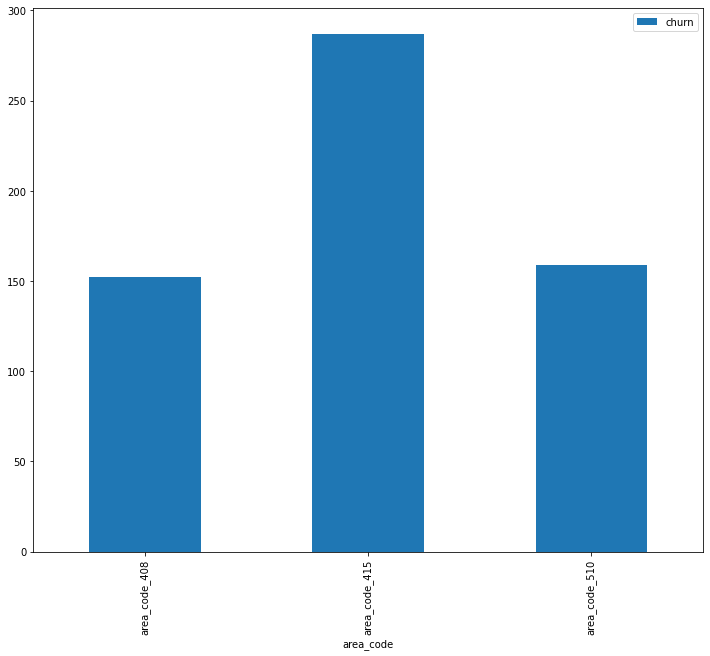

In [286]:
train_data.groupby(['area_code']).sum().plot(kind='bar', y='churn', figsize=(12,10))

<AxesSubplot:xlabel='voice_mail_plan'>

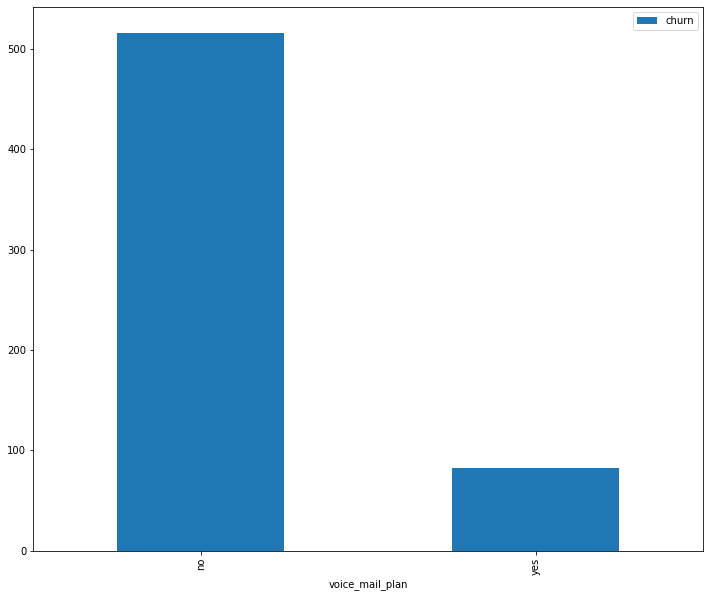

In [292]:
train_data.groupby(['voice_mail_plan']).sum().plot(kind='bar', y='churn', figsize=(12,10))

In [182]:
data = pd.get_dummies(data = train_data, columns=['area_code', 'international_plan', 'voice_mail_plan'])
data.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,3.70,1,0,0,1,0,1,0,0,1
1,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,3.29,0,0,0,1,0,1,0,1,0
2,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,...,1.78,2,0,1,0,0,0,1,1,0
3,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,2.73,3,0,0,1,0,0,1,1,0
4,MA,121,24,218.2,88,37.09,348.5,108,29.62,212.6,...,2.03,3,0,0,0,1,1,0,0,1


In [183]:
data.columns

Index(['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'area_code_area_code_408',
       'area_code_area_code_415', 'area_code_area_code_510',
       'international_plan_no', 'international_plan_yes', 'voice_mail_plan_no',
       'voice_mail_plan_yes'],
      dtype='object')

In [184]:
data.shape

(4250, 24)

In [185]:
data.dtypes

state                             object
account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
area_code_area_code_408            uint8
area_code_area_code_415            uint8
area_code_area_code_510            uint8
international_plan_no              uint8
international_plan_yes             uint8
voice_mail_plan_no                 uint8
voice_mail_plan_yes                uint8
dtype: object

In [186]:
Y = data['churn']
data = data.drop('churn', axis=1)
data.columns

Index(['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_area_code_408',
       'area_code_area_code_415', 'area_code_area_code_510',
       'international_plan_no', 'international_plan_yes', 'voice_mail_plan_no',
       'voice_mail_plan_yes'],
      dtype='object')

In [187]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64

In [188]:
data = data.drop('state', axis =1)
data.astype('float')
data.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3,3.70,1,0,1,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,5,3.29,0,0,1,0,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,7,1.78,2,1,0,0,0,1,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,3,2.73,3,0,1,0,0,1,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,7,2.03,3,0,0,1,1,0,0,1


In [189]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(data, Y, random_state=20, test_size=0.2)
print(new_x_test.shape, new_x_train.shape, new_y_test.shape, new_y_train.shape)

(850, 22) (3400, 22) (850,) (3400,)


In [190]:
new_x_train_scaled = preprocessing.StandardScaler().fit_transform(new_x_train)
new_x_test_scaled = preprocessing.StandardScaler().fit_transform(new_x_test)

In [191]:
tree_grid.fit(new_x_train, new_y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [192]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=10)

In [193]:
tree_grid.best_score_

0.9302941176470587

In [194]:
new_tree_predictions = tree_grid.predict(new_x_test)
new_tree_predictions[0:5]

array([0, 0, 0, 1, 0])

In [260]:
new_tree_accuracy_score = accuracy_score(new_y_test, new_tree_predictions)
new_tree_accuracy_score

0.9011764705882352

In [207]:
tree_grid_scaled.fit(new_x_train_scaled, new_y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [208]:
tree_grid_scaled.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=10)

In [209]:
tree_grid_scaled.best_score_

0.9288235294117647

In [211]:
new_scaled_tree_predictions = tree_grid_scaled.predict(new_x_test_scaled)
new_scaled_tree_predictions[0:5]

array([0, 0, 0, 1, 0])

In [261]:
new_tree_scaled_accuracy_score = accuracy_score(new_y_test, new_scaled_tree_predictions)
new_tree_scaled_accuracy_score

0.9094117647058824

In [214]:
print(classification_report(new_y_test, new_scaled_tree_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       722
           1       0.73      0.64      0.68       128

    accuracy                           0.91       850
   macro avg       0.83      0.80      0.81       850
weighted avg       0.91      0.91      0.91       850



In [215]:
svm_grid.fit(new_x_train, new_y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [216]:
svm_grid.best_estimator_

SVC(kernel='linear')

In [217]:
svm_grid.best_score_

0.861764705882353

In [219]:
svm_grid.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [220]:
new_svm_predictions = svm_grid.predict(new_x_test)
new_svm_predictions[0:5]

array([0, 0, 0, 0, 0])

In [262]:
new_svm_accuracy_score = accuracy_score(new_y_test, new_svm_predictions)
new_svm_accuracy_score

0.8494117647058823

In [222]:
svm_grid_scaled.fit(new_x_train_scaled, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid']})

In [223]:
svm_grid_scaled.best_estimator_

SVC(kernel='linear')

In [224]:
svm_grid_scaled.best_score_

0.8608823529411764

In [225]:
new_svm_scaled_predictions = svm_grid_scaled.predict(new_x_test_scaled)
new_svm_scaled_predictions[0:5]

array([0, 0, 0, 0, 0])

In [263]:
new_svm_scaled_accuracy_score = accuracy_score(y_test, new_svm_scaled_predictions)
new_svm_scaled_accuracy_score

0.8529411764705882

In [228]:
print(classification_report(y_test, new_svm_scaled_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       125

    accuracy                           0.85       850
   macro avg       0.43      0.50      0.46       850
weighted avg       0.73      0.85      0.79       850



In [229]:
knn_grid.fit(new_x_train, new_y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [230]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1)

In [231]:
knn_grid.best_score_

0.8920588235294118

In [233]:
new_knn_predictions = knn_grid.predict(new_x_test)
new_knn_predictions[0:5]

array([0, 0, 0, 1, 0])

In [264]:
new_knn_accuracy_score = accuracy_score(new_y_test, new_knn_predictions)
new_knn_accuracy_score

0.8941176470588236

In [235]:
knn_grid_scaled.fit(new_x_train_scaled, new_y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [236]:
knn_grid_scaled.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1)

In [237]:
knn_grid_scaled.best_score_

0.891470588235294

In [238]:
new_knn_scaled_predictions = knn_grid_scaled.predict(new_x_test_scaled)
new_knn_scaled_predictions[0:5]

array([0, 0, 0, 1, 0])

In [265]:
new_knn_scaled_accuracy_score = accuracy_score(new_y_test, new_knn_scaled_predictions)
new_knn_scaled_accuracy_score

0.8858823529411765

In [240]:
print(classification_report(new_y_test, new_knn_scaled_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       722
           1       0.78      0.34      0.47       128

    accuracy                           0.89       850
   macro avg       0.84      0.66      0.70       850
weighted avg       0.88      0.89      0.87       850



In [243]:
lr_grid.fit(new_x_train_scaled, new_y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 200],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [244]:
lr_grid.best_estimator_

LogisticRegression(C=0.01)

In [245]:
lr_grid.best_score_

0.8691176470588236

In [246]:
new_lr_grid_predictions = lr_grid.predict(new_x_test_scaled)
new_lr_grid_predictions[0:5]

array([0, 0, 0, 1, 1])

In [268]:
new_lr_scaled_accuracy_score= accuracy_score(new_y_test, new_lr_grid_predictions)
new_lr_scaled_accuracy_score

0.8588235294117647

In [249]:
print(classification_report(new_y_test, new_lr_grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       722
           1       0.63      0.15      0.24       128

    accuracy                           0.86       850
   macro avg       0.75      0.57      0.58       850
weighted avg       0.83      0.86      0.82       850



In [258]:
secondary_dataframe = pd.DataFrame(columns=['Accuracy Score', 'Scaled Accuracy Score'])
secondary_dataframe

,Accuracy Score,Scaled Accuracy Score


In [271]:
secondary_dataframe.loc['Decision Tree'] = [new_tree_accuracy_score, new_tree_scaled_accuracy_score]
secondary_dataframe.loc['SVM'] = [new_svm_accuracy_score, new_svm_scaled_accuracy_score]
secondary_dataframe.loc['KNN'] = [new_knn_accuracy_score, new_knn_scaled_accuracy_score]
secondary_dataframe.loc['Logistic Regression'] = [np.nan, new_lr_scaled_accuracy_score]

secondary_dataframe

,Accuracy Score,Scaled Accuracy Score
Decision Tree,0.901176,0.909412
SVM,0.849412,0.852941
KNN,0.894118,0.885882
Logistic Regression,NaN,0.858824


In [272]:
original_dataframe

,Accuracy Score,Scaled Accuracy Score
Decision Tree,0.897647,0.904706
SVM,0.852941,0.852941
KNN,0.895294,0.887059
Logistic Regression,NaN,0.858824


Analysis showed the best model for predicting customer churn in regards to accuracy score was the Decision Tree model with only the numerical values from the original data as both model returned an accuracy score or over 0.9.